<a href="https://colab.research.google.com/github/atran13/MSc-Thesis-Gentrification-and-storefront-signage/blob/main/output_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
from scipy.special import softmax
import pandas as pd
import os, glob
from PIL import Image
from ast import literal_eval

## StreetSwipe

In [48]:
df_SS = pd.read_csv('/content/drive/MyDrive/MASTERS/Thesis/Code/models/df_resnet_SS.csv', index_col=0)
df_SS = df_SS.iloc[: , 1:5]
print(df_SS.columns)
print(len(df_SS))

Index(['img_name', 'label', 'prediction', 'logits'], dtype='object')
10079


In [49]:
df_SS['logits'] = df_SS.apply(lambda row: literal_eval(row['logits']), axis=1)
df_SS['logits'] = df_SS.apply(lambda row: np.array(row['logits']), axis=1)
type(df_SS['logits'][0])

numpy.ndarray

In [50]:
df_SS['probs'] = df_SS.apply(lambda row: softmax(row['logits']), axis=1)
df_SS.head()

img_name  label  prediction  \
0      1442_rec-4.jpg      0           0   
1      1442_rec-3.jpg      0           0   
2      1442_rec-0.jpg      0           0   
3      1442_rec-2.jpg      0           0   
4      1442_rec-1.jpg      0           0   
...               ...    ...         ...   
10074   154_rec-0.jpg      1           1   
10075   289_rec-1.jpg      1           1   
10076   833_rec-0.jpg      1           1   
10077   422_rec-3.jpg      1           1   
10078   422_rec-1.jpg      1           1   

                                           logits  \
0        [0.745664656162262, -0.5221627950668335]   
1       [1.0457912683486938, -0.6305771470069885]   
2      [0.5490521192550659, -0.28820109367370605]   
3       [0.7427459955215454, -0.5331131219863892]   
4      [0.7099773287773132, -0.39124104380607605]   
...                                           ...   
10074     [-2.797410488128662, 2.867607593536377]   
10075  [-0.06097613647580147, 0.2709873914718628]   
10076    [-0.5069760680198669, 0.624496340751648]   
10077   [-1.6520484685897827, 1.7131710052490234]   
10078   [-1.4582676887512207, 1.4240055084228516]   

                                             probs  
0         [0.7803706165622731, 0.2196293834377269]  
1        [0.8424230503974642, 0.15757694960253577]  
2        [0.6978863957227316, 0.30211360427726835]  
3        [0.7817440822454907, 0.21825591775450923]  
4        [0.7504883223055113, 0.24951167769448865]  
...                                            ...  
10074  [0.0034531197637423265, 0.9965468802362576]  
10075     [0.4177629434003887, 0.5822370565996112]  
10076     [0.24388947545234793, 0.756110524547652]  
10077    [0.03340030300982879, 0.9665996969901713]  
10078    [0.05303685140257217, 0.9469631485974277]  

[10079 rows x 5 columns]

In [51]:
type(df_SS['probs'][0][0])

numpy.float64

In [87]:
df_SS[['prob0','prob1']] = pd.DataFrame(df_SS.probs.tolist(), index= df_SS.index)

In [88]:
df_SS_correct = df_SS[df_SS['label']==df_SS['prediction']].reset_index(drop=True)
df_SS_correct

img_name  label  prediction  \
0     1442_rec-4.jpg      0           0   
1     1442_rec-3.jpg      0           0   
2     1442_rec-0.jpg      0           0   
3     1442_rec-2.jpg      0           0   
4     1442_rec-1.jpg      0           0   
...              ...    ...         ...   
7889   154_rec-0.jpg      1           1   
7890   289_rec-1.jpg      1           1   
7891   833_rec-0.jpg      1           1   
7892   422_rec-3.jpg      1           1   
7893   422_rec-1.jpg      1           1   

                                          logits  \
0       [0.745664656162262, -0.5221627950668335]   
1      [1.0457912683486938, -0.6305771470069885]   
2     [0.5490521192550659, -0.28820109367370605]   
3      [0.7427459955215454, -0.5331131219863892]   
4     [0.7099773287773132, -0.39124104380607605]   
...                                          ...   
7889     [-2.797410488128662, 2.867607593536377]   
7890  [-0.06097613647580147, 0.2709873914718628]   
7891    [-0.5069760680198669, 0.624496340751648]   
7892   [-1.6520484685897827, 1.7131710052490234]   
7893   [-1.4582676887512207, 1.4240055084228516]   

                                            probs     prob0     prob1  
0        [0.7803706165622731, 0.2196293834377269]  0.780371  0.219629  
1       [0.8424230503974642, 0.15757694960253577]  0.842423  0.157577  
2       [0.6978863957227316, 0.30211360427726835]  0.697886  0.302114  
3       [0.7817440822454907, 0.21825591775450923]  0.781744  0.218256  
4       [0.7504883223055113, 0.24951167769448865]  0.750488  0.249512  
...                                           ...       ...       ...  
7889  [0.0034531197637423265, 0.9965468802362576]  0.003453  0.996547  
7890     [0.4177629434003887, 0.5822370565996112]  0.417763  0.582237  
7891     [0.24388947545234793, 0.756110524547652]  0.243889  0.756111  
7892    [0.03340030300982879, 0.9665996969901713]  0.033400  0.966600  
7893    [0.05303685140257217, 0.9469631485974277]  0.053037  0.946963  

[7894 rows x 7 columns]

In [76]:
# {'gentrified': 0, 'non-gentrified': 1}
df_SS_correct_gen = df_SS_correct.sort_values(['prob0'], ascending=False).head(20)
df_SS_correct_non = df_SS_correct.sort_values(['prob1'], ascending=False).head(20)

In [55]:
SS_root_dir = '/content/drive/MyDrive/MASTERS/Thesis/Data/in_use/resnet/SS'

In [67]:
SS_correct_gen_paths = []
for c in glob.glob(SS_root_dir + '/*'):
    for i in glob.glob(c + '/*'):
        img_name = i.split('/')[-1]
        if img_name in df_SS_correct_gen['img_name'].values:
            SS_correct_gen_paths.append(i)
len(SS_correct_gen_paths)

20

In [77]:
SS_correct_non_paths = []
for c in glob.glob(SS_root_dir + '/*'):
    for i in glob.glob(c + '/*'):
        img_name = i.split('/')[-1]
        if img_name in df_SS_correct_non['img_name'].values:
            SS_correct_non_paths.append(i)
len(SS_correct_non_paths)

20

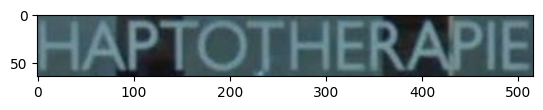

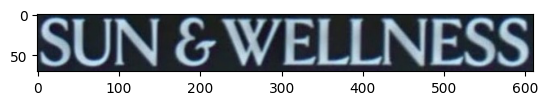

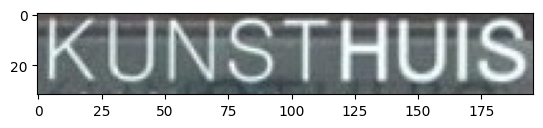

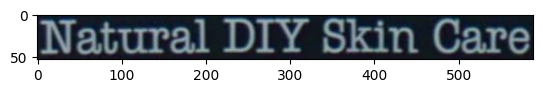

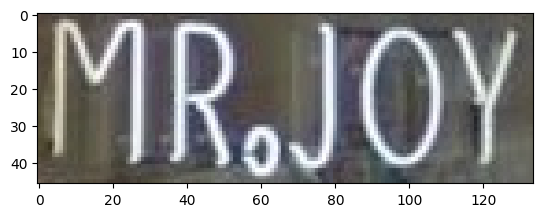

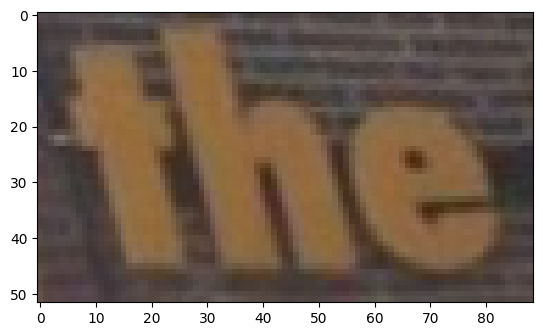

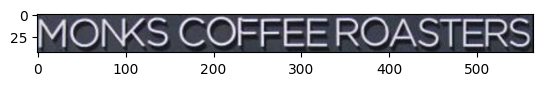

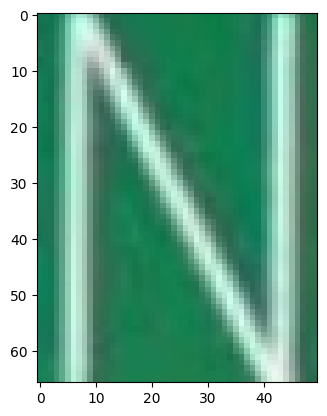

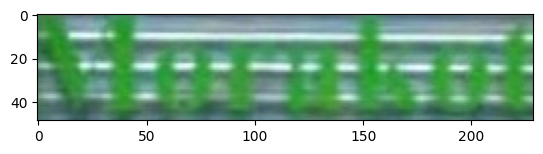

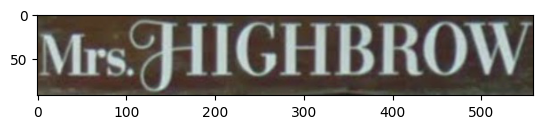

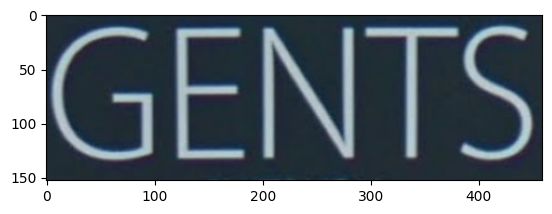

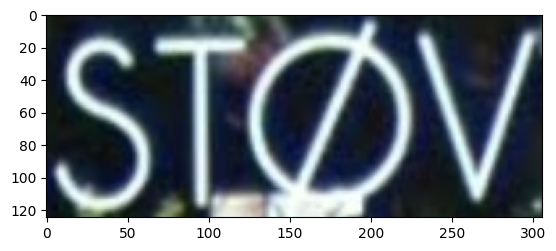

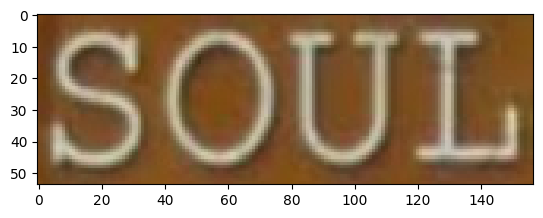

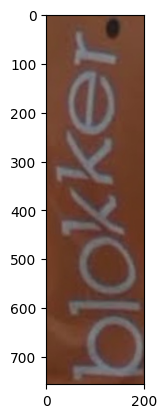

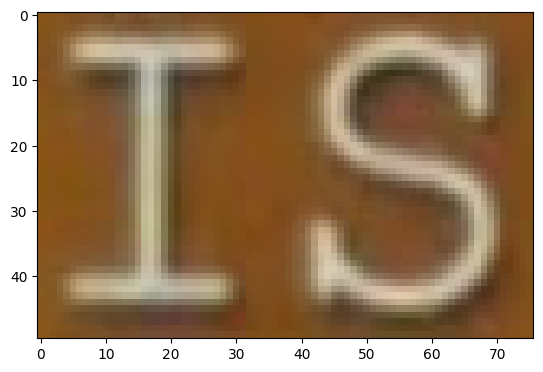

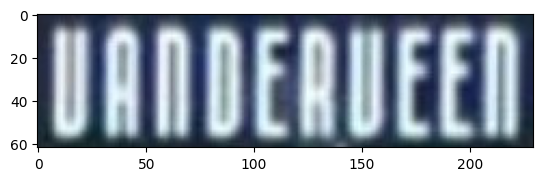

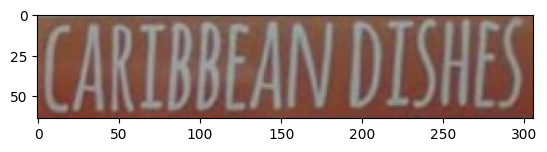

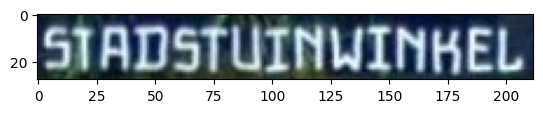

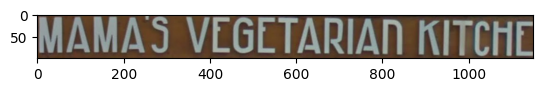

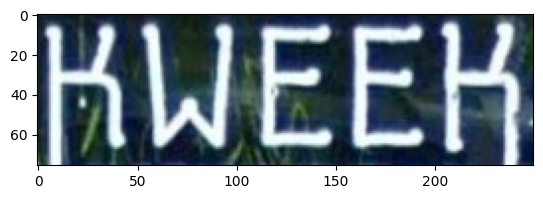

In [96]:
# def get_img(path):
#     img = Image.open(path).convert('RGB')
#     img = np.asarray(img)
#     return img

# # GENTRIFIED
# img_arr_gen = []

# for path in SS_correct_gen_paths:
#     img_arr_gen.append(get_img(path))

# fig = plt.figure(figsize=(15., 20.))
# grid = ImageGrid(fig, 111,
#                  nrows_ncols=(5,4)  # creates 2x2 grid of axes
#                 #  axes_pad=0.1,  # pad between axes
#                  )

# for ax, im in zip(grid, img_arr_gen):
#     ax.imshow(im)

# plt.show()

for path in SS_correct_gen_paths:
    img = Image.open(path)
    plt.imshow(img)
    plt.show()

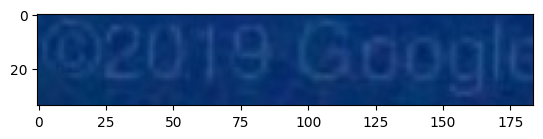

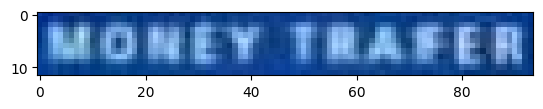

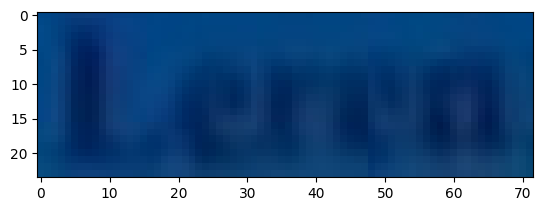

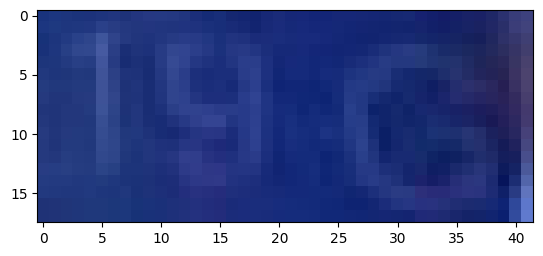

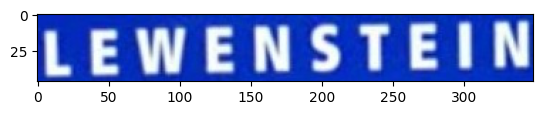

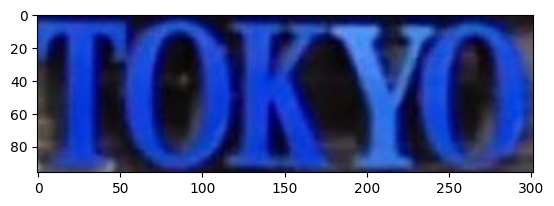

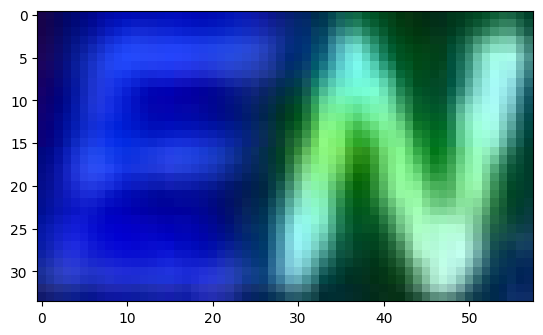

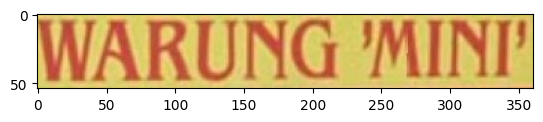

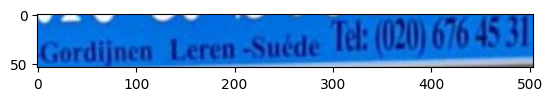

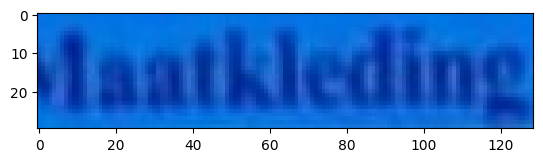

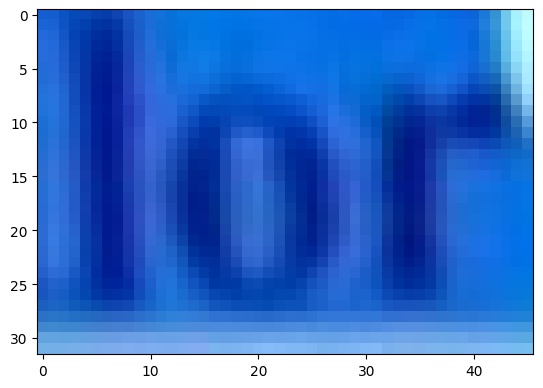

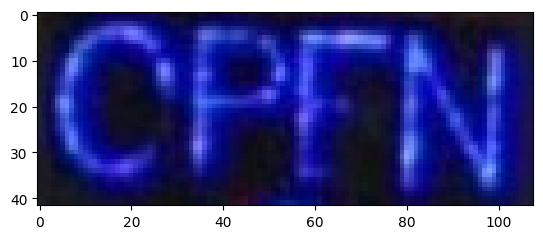

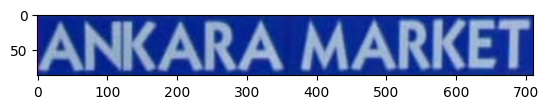

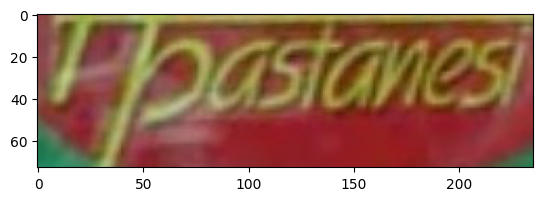

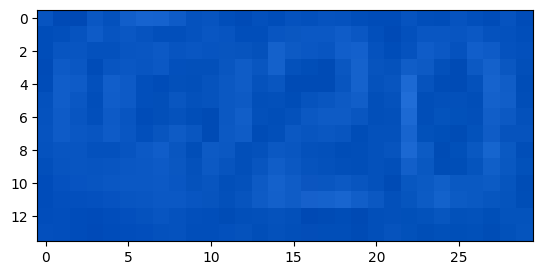

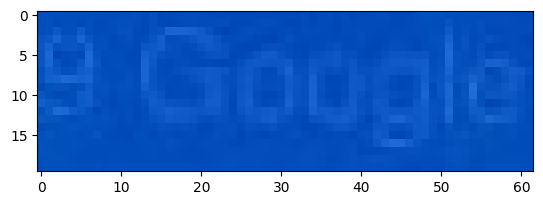

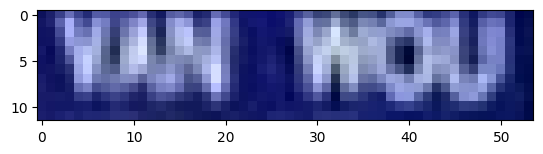

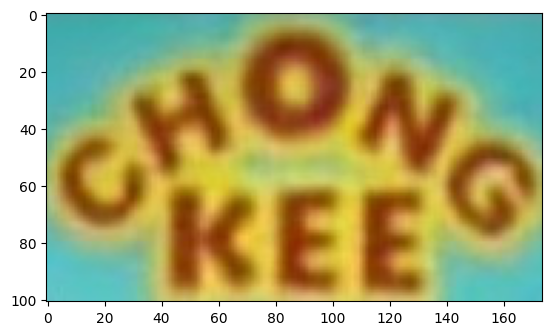

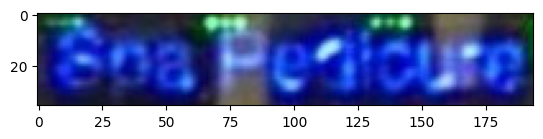

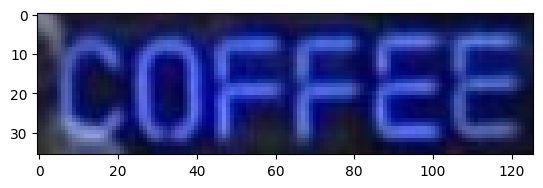

In [97]:
# NON-GENTRIFIED
for path in SS_correct_non_paths:
    img = Image.open(path)
    plt.imshow(img)
    plt.show()
# img_arr_non = []

# for path in SS_correct_non_paths:
#     img_arr_non.append(get_img(path))

# fig = plt.figure(figsize=(15., 20.))
# grid = ImageGrid(fig, 111,
#                  nrows_ncols=(5,4)  # creates 2x2 grid of axes
#                 #  axes_pad=0.1,  # pad between axes
#                  )

# for ax, im in zip(grid, img_arr_non):
#     ax.imshow(im)

# plt.show()

### Incorrect classifications

In [89]:
df_SS_incorrect = df_SS[df_SS['label']!=df_SS['prediction']].reset_index(drop=True)
df_SS_incorrect

img_name  label  prediction  \
0     1442_rec-5.jpg      0           1   
1     1442_rec-6.jpg      0           1   
2      789_rec-2.jpg      0           1   
3      789_rec-3.jpg      0           1   
4      789_rec-5.jpg      0           1   
...              ...    ...         ...   
2180    85_rec-2.jpg      1           0   
2181  523_poly-0.jpg      1           0   
2182   523_rec-4.jpg      1           0   
2183   523_rec-2.jpg      1           0   
2184   289_rec-3.jpg      1           0   

                                            logits  \
0      [-0.09417650103569031, 0.17384035885334015]   
1       [-0.37906238436698914, 0.4642731249332428]   
2       [-0.19797177612781525, 0.3060002624988556]   
3     [-0.041614092886447906, 0.19109086692333221]   
4       [-0.38675302267074585, 0.4465620219707489]   
...                                            ...   
2180    [0.2603610157966614, -0.12427423894405365]   
2181   [0.30404508113861084, -0.14143504202365875]   
2182     [0.7806759476661682, -0.5261619687080383]   
2183     [0.3408818244934082, -0.1906011998653412]   
2184     [0.7419483661651611, -0.5318053960800171]   

                                          probs     prob0     prob1  
0      [0.43339401766830404, 0.566605982331696]  0.433394  0.566606  
1     [0.30083275257034114, 0.6991672474296587]  0.300833  0.699167  
2      [0.3766076800205744, 0.6233923199794256]  0.376608  0.623392  
3      [0.4420848741952824, 0.5579151258047175]  0.442085  0.557915  
4     [0.30294457802837976, 0.6970554219716202]  0.302945  0.697055  
...                                         ...       ...       ...  
2180   [0.5949905817708158, 0.4050094182291843]  0.594991  0.405009  
2181  [0.6095640568938508, 0.39043594310614904]  0.609564  0.390436  
2182  [0.7869835438156845, 0.21301645618431544]  0.786984  0.213016  
2183   [0.6298289373830913, 0.3701710626169087]  0.629829  0.370171  
2184  [0.7813846528872048, 0.21861534711279515]  0.781385  0.218615  

[2185 rows x 7 columns]

In [90]:
# {'gentrified': 0, 'non-gentrified': 1}
df_SS_incorrect_gen = df_SS_incorrect.sort_values(['prob0'], ascending=False).head(20) # False gentrified
df_SS_incorrect_non = df_SS_incorrect.sort_values(['prob1'], ascending=False).head(20) # False non-gentrified

In [91]:
SS_incorrect_gen_paths = []
for c in glob.glob(SS_root_dir + '/*'):
    for i in glob.glob(c + '/*'):
        img_name = i.split('/')[-1]
        if img_name in df_SS_incorrect_gen['img_name'].values:
            SS_incorrect_gen_paths.append(i)
len(SS_incorrect_gen_paths)

20

In [93]:
SS_incorrect_non_paths = []
for c in glob.glob(SS_root_dir + '/*'):
    for i in glob.glob(c + '/*'):
        img_name = i.split('/')[-1]
        if img_name in df_SS_incorrect_non['img_name'].values:
            SS_incorrect_non_paths.append(i)
len(SS_incorrect_non_paths)

20

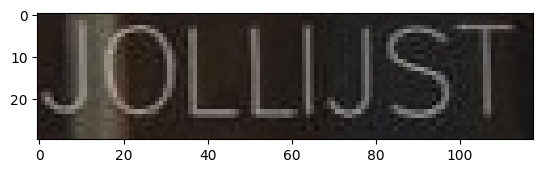

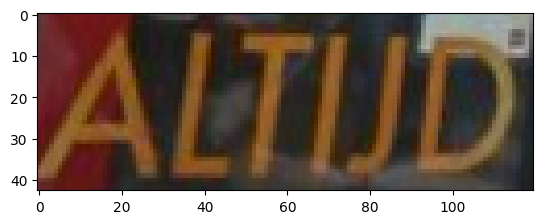

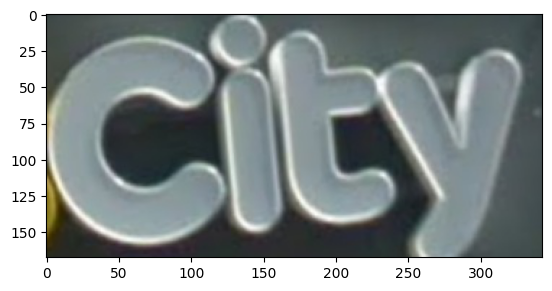

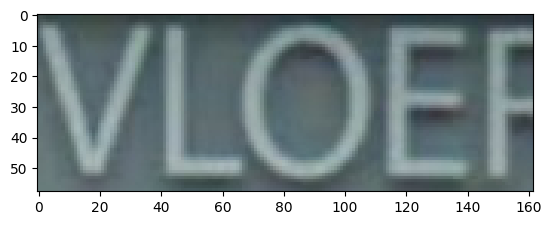

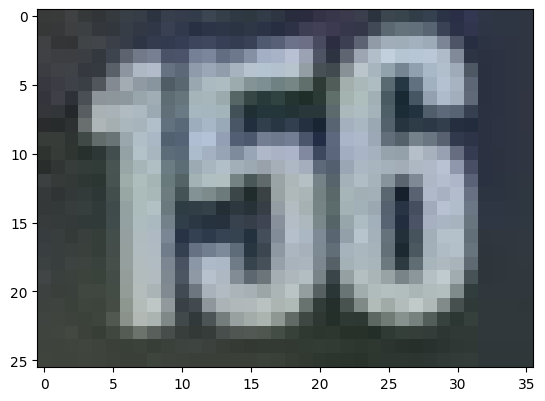

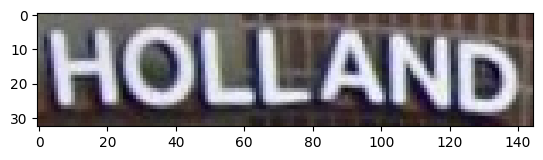

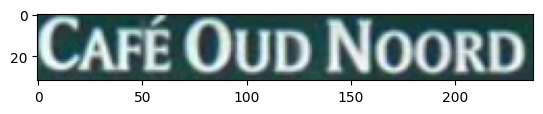

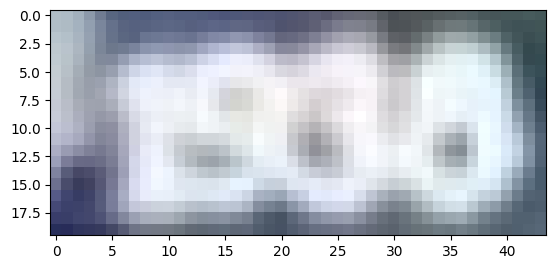

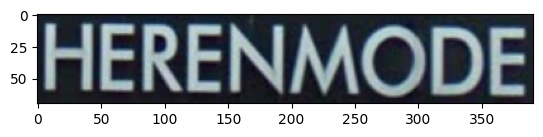

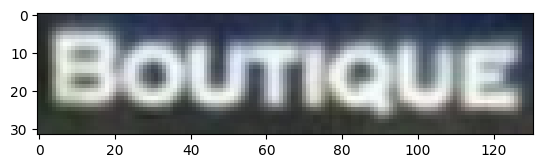

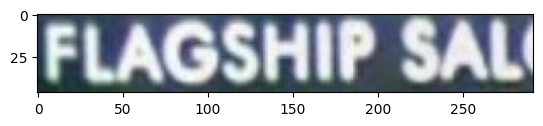

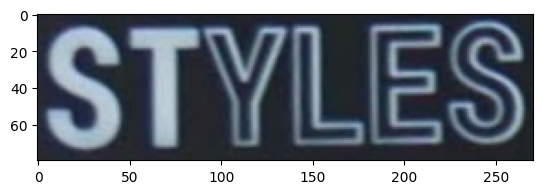

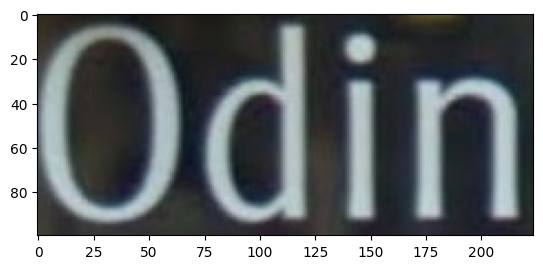

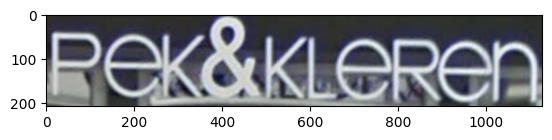

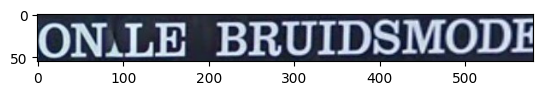

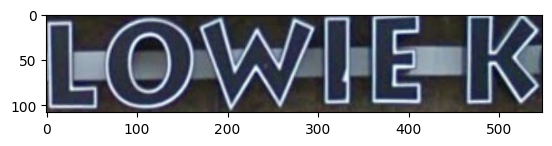

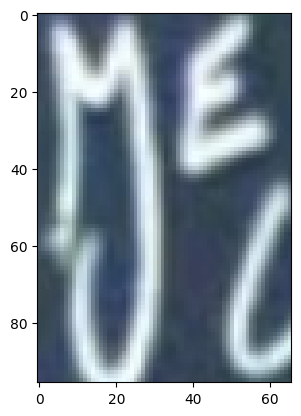

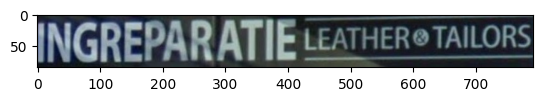

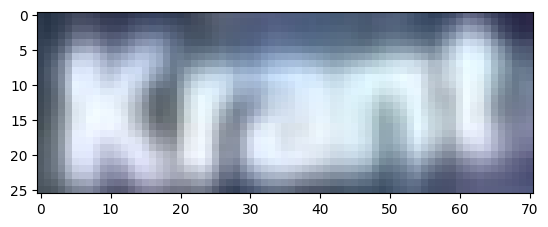

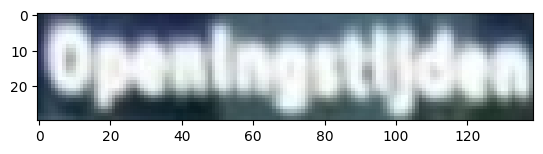

In [98]:
for path in SS_incorrect_gen_paths:
    img = Image.open(path)
    plt.imshow(img)
    plt.show()

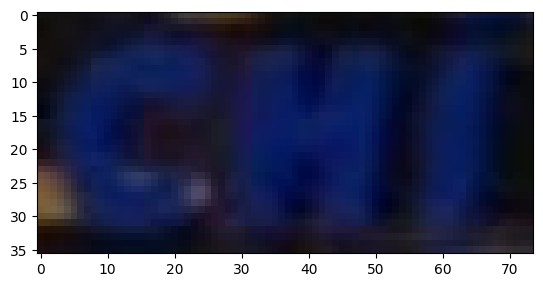

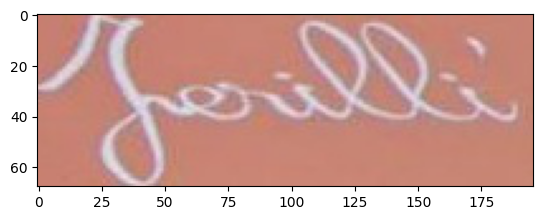

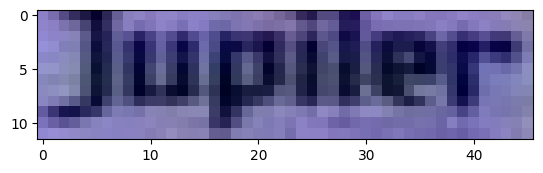

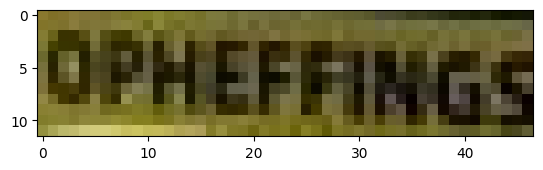

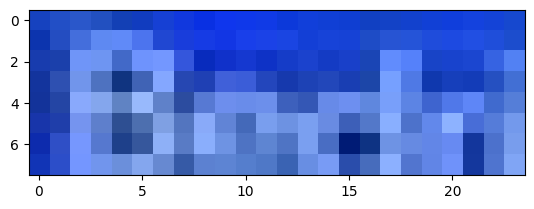

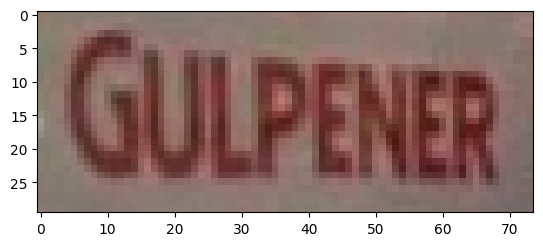

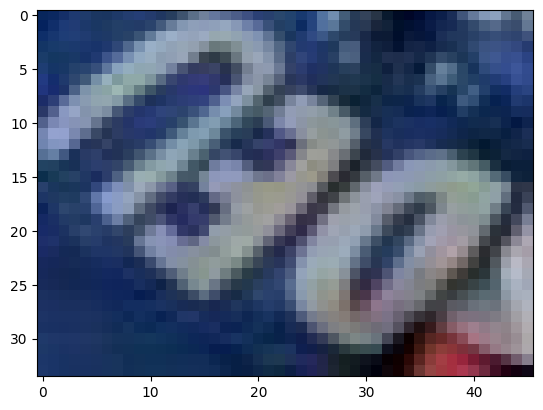

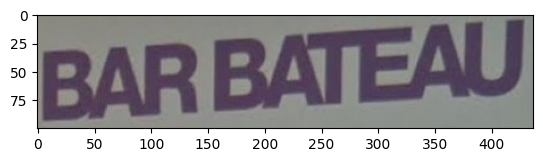

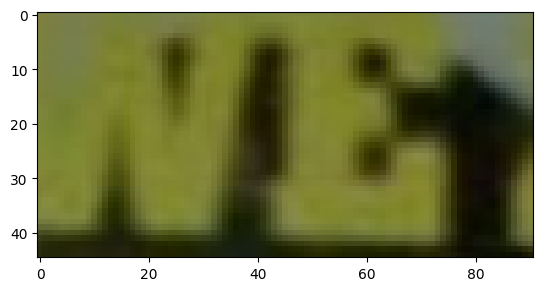

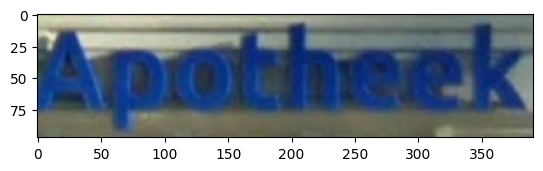

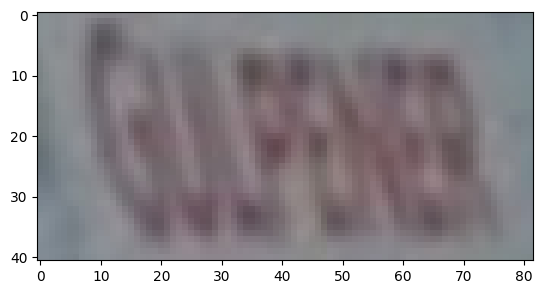

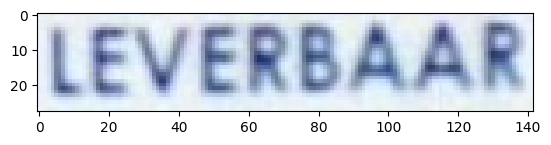

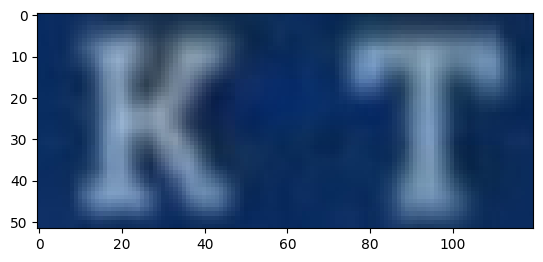

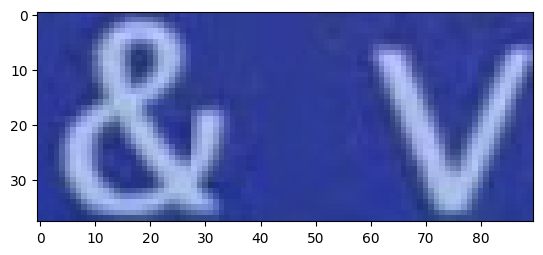

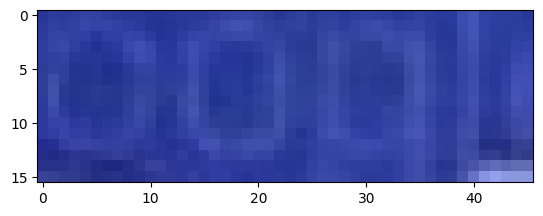

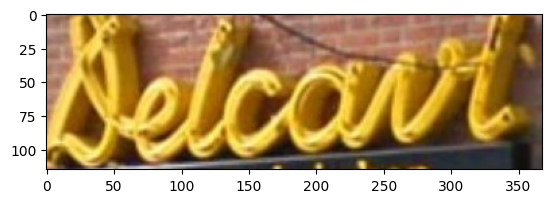

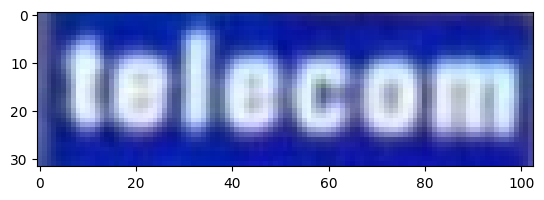

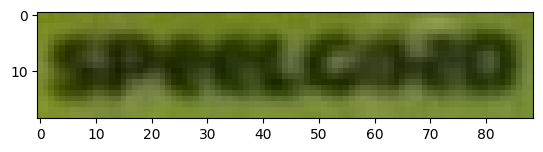

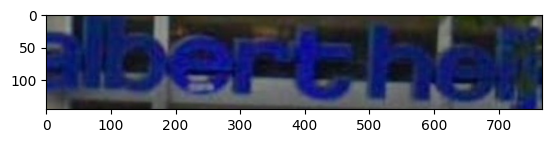

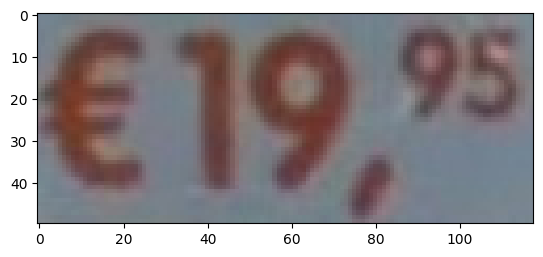

In [99]:
# FALSE NON-GENTRIFIED
for path in SS_incorrect_non_paths:
    img = Image.open(path)
    plt.imshow(img)
    plt.show()

## Panomaras

In [86]:
df_pano = pd.read_csv('/content/drive/MyDrive/MASTERS/Thesis/Code/models/df_resnet_pano.csv', index_col=0)
df_pano.head()

img_name  label  prediction  \
0  20230227TMX7316010203-002985pano_0000_000113_4...      0           1   
1  20210317TMX7316010203-002044pano_0000_001722_4...      0           0   
2  20210317TMX7316010203-002044pano_0000_000786_4...      0           0   
3  20230227TMX7316010203-002985pano_0000_000113_4...      0           1   
4  20220429TMX7316010203-002550pano_0000_000417_4...      0           1   

                                        logits  
0    [-0.8720466494560242, 0.9993380308151245]  
1   [0.5854475498199463, -0.44877102971076965]  
2     [0.8320134878158569, -0.627690315246582]  
3      [-1.894683837890625, 2.128199815750122]  
4  [0.027477893978357315, 0.11199470609426498]

In [100]:
print(df_pano.columns)
print(len(df_pano))

Index(['img_name', 'label', 'prediction', 'logits'], dtype='object')
2473


In [101]:
df_pano['logits'] = df_pano.apply(lambda row: literal_eval(row['logits']), axis=1)
df_pano['logits'] = df_pano.apply(lambda row: np.array(row['logits']), axis=1)
type(df_pano['logits'][0])

numpy.ndarray

In [102]:
df_pano['probs'] = df_pano.apply(lambda row: softmax(row['logits']), axis=1)
df_pano

img_name  label  prediction  \
0     20230227TMX7316010203-002985pano_0000_000113_4...      0           1   
1     20210317TMX7316010203-002044pano_0000_001722_4...      0           0   
2     20210317TMX7316010203-002044pano_0000_000786_4...      0           0   
3     20230227TMX7316010203-002985pano_0000_000113_4...      0           1   
4     20220429TMX7316010203-002550pano_0000_000417_4...      0           1   
...                                                 ...    ...         ...   
2468  20210614TMX7316010203-002170pano_0001_000073_4...      1           1   
2469  20210614TMX7316010203-002170pano_0001_000073_4...      1           0   
2470  20221230TMX7316010203-002903pano_0000_001263_4...      1           1   
2471  20210607TMX7316010203-002158pano_0000_000908_4...      1           0   
2472  20221230TMX7316010203-002903pano_0000_003210_4...      1           1   

                                           logits  \
0       [-0.8720466494560242, 0.9993380308151245]   
1      [0.5854475498199463, -0.44877102971076965]   
2        [0.8320134878158569, -0.627690315246582]   
3         [-1.894683837890625, 2.128199815750122]   
4     [0.027477893978357315, 0.11199470609426498]   
...                                           ...   
2468   [-0.06084827706217766, 0.1804630011320114]   
2469   [0.4965347647666931, -0.43309861421585083]   
2470  [-0.26613229513168335, 0.36995697021484375]   
2471  [0.21133968234062195, -0.11464741080999374]   
2472  [-0.15074962377548218, 0.34902745485305786]   

                                           probs  
0      [0.13338158477413764, 0.8666184152258624]  
1       [0.7377329376648796, 0.2622670623351204]  
2      [0.8114873680565539, 0.18851263194344625]  
3     [0.017586449606835433, 0.9824135503931645]  
4      [0.47888336531268433, 0.5211166346873156]  
...                                          ...  
2468    [0.4399632321818939, 0.5600367678181061]  
2469     [0.717000900117638, 0.2829990998823621]  
2470   [0.34613110051462714, 0.6538688994853729]  
2471   [0.5807826556449223, 0.41921734435507774]  
2472    [0.3775930575779015, 0.6224069424220984]  

[2473 rows x 5 columns]

In [103]:
df_pano[['prob0','prob1']] = pd.DataFrame(df_pano.probs.tolist(), index= df_pano.index)
df_pano

img_name  label  prediction  \
0     20230227TMX7316010203-002985pano_0000_000113_4...      0           1   
1     20210317TMX7316010203-002044pano_0000_001722_4...      0           0   
2     20210317TMX7316010203-002044pano_0000_000786_4...      0           0   
3     20230227TMX7316010203-002985pano_0000_000113_4...      0           1   
4     20220429TMX7316010203-002550pano_0000_000417_4...      0           1   
...                                                 ...    ...         ...   
2468  20210614TMX7316010203-002170pano_0001_000073_4...      1           1   
2469  20210614TMX7316010203-002170pano_0001_000073_4...      1           0   
2470  20221230TMX7316010203-002903pano_0000_001263_4...      1           1   
2471  20210607TMX7316010203-002158pano_0000_000908_4...      1           0   
2472  20221230TMX7316010203-002903pano_0000_003210_4...      1           1   

                                           logits  \
0       [-0.8720466494560242, 0.9993380308151245]   
1      [0.5854475498199463, -0.44877102971076965]   
2        [0.8320134878158569, -0.627690315246582]   
3         [-1.894683837890625, 2.128199815750122]   
4     [0.027477893978357315, 0.11199470609426498]   
...                                           ...   
2468   [-0.06084827706217766, 0.1804630011320114]   
2469   [0.4965347647666931, -0.43309861421585083]   
2470  [-0.26613229513168335, 0.36995697021484375]   
2471  [0.21133968234062195, -0.11464741080999374]   
2472  [-0.15074962377548218, 0.34902745485305786]   

                                           probs     prob0     prob1  
0      [0.13338158477413764, 0.8666184152258624]  0.133382  0.866618  
1       [0.7377329376648796, 0.2622670623351204]  0.737733  0.262267  
2      [0.8114873680565539, 0.18851263194344625]  0.811487  0.188513  
3     [0.017586449606835433, 0.9824135503931645]  0.017586  0.982414  
4      [0.47888336531268433, 0.5211166346873156]  0.478883  0.521117  
...                                          ...       ...       ...  
2468    [0.4399632321818939, 0.5600367678181061]  0.439963  0.560037  
2469     [0.717000900117638, 0.2829990998823621]  0.717001  0.282999  
2470   [0.34613110051462714, 0.6538688994853729]  0.346131  0.653869  
2471   [0.5807826556449223, 0.41921734435507774]  0.580783  0.419217  
2472    [0.3775930575779015, 0.6224069424220984]  0.377593  0.622407  

[2473 rows x 7 columns]

In [104]:
# {'gentrified': 0, 'non-gentrified': 1}
df_pano_gen = df_pano.sort_values(['prob0'], ascending=False).head(20)
df_pano_non = df_pano.sort_values(['prob1'], ascending=False).head(20)

In [105]:
pano_root_dir = '/content/drive/MyDrive/MASTERS/Thesis/Data/in_use/resnet/pano'

In [106]:
pano_gen_paths = []
for c in glob.glob(pano_root_dir + '/*'):
    for i in glob.glob(c + '/*'):
        img_name = i.split('/')[-1]
        if img_name in df_pano_gen['img_name'].values:
            pano_gen_paths.append(i)
len(pano_gen_paths)

20

In [107]:
pano_non_paths = []
for c in glob.glob(pano_root_dir + '/*'):
    for i in glob.glob(c + '/*'):
        img_name = i.split('/')[-1]
        if img_name in df_pano_non['img_name'].values:
            pano_non_paths.append(i)
len(pano_non_paths)

20

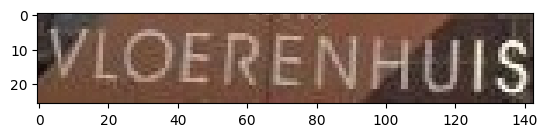

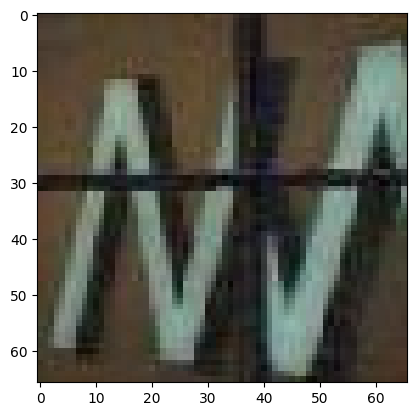

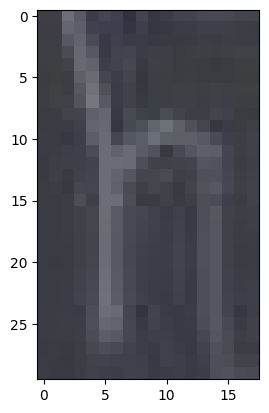

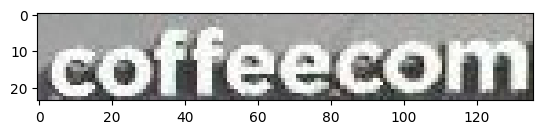

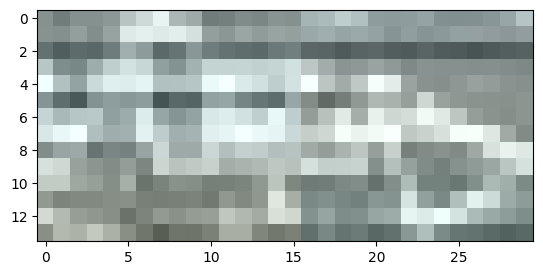

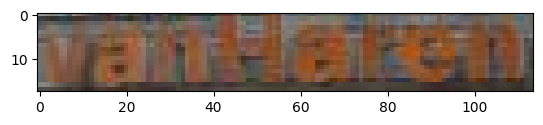

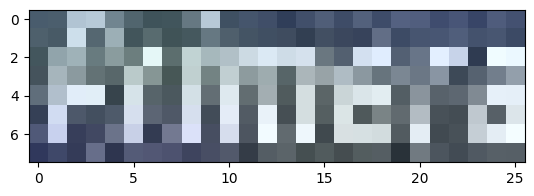

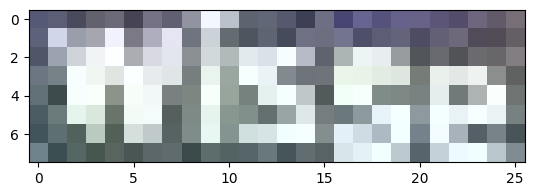

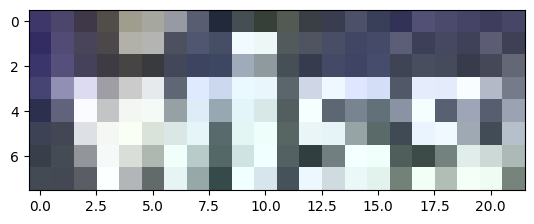

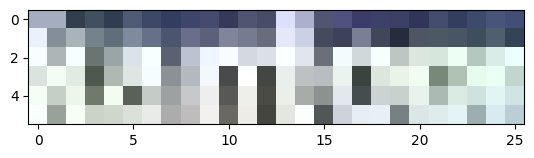

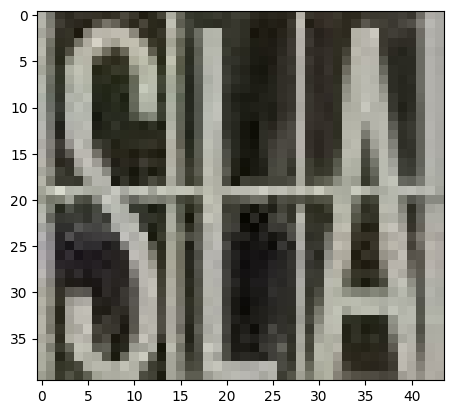

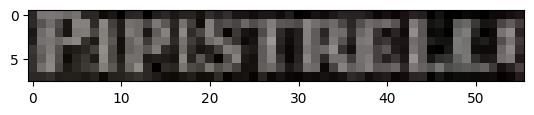

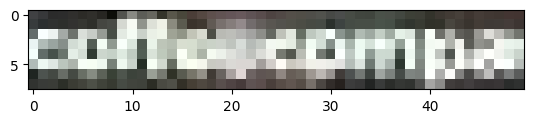

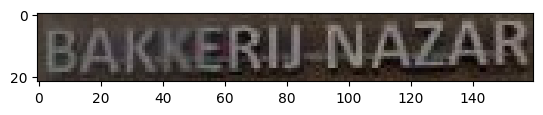

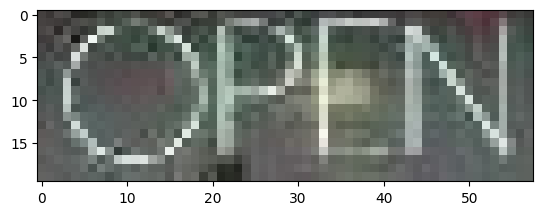

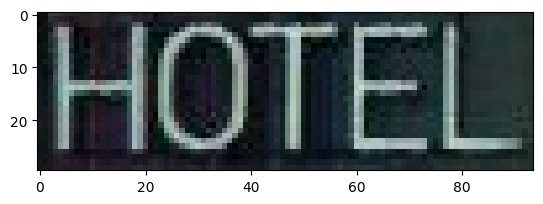

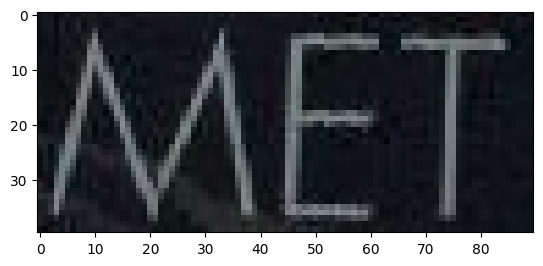

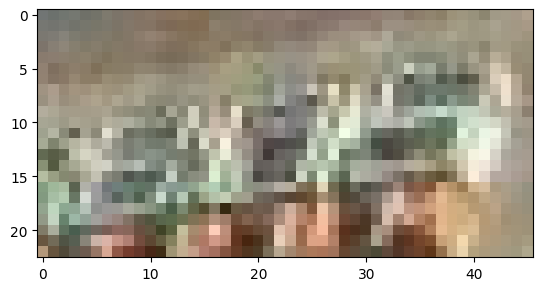

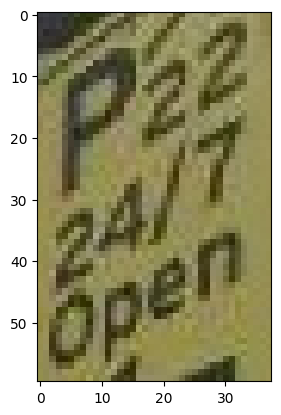

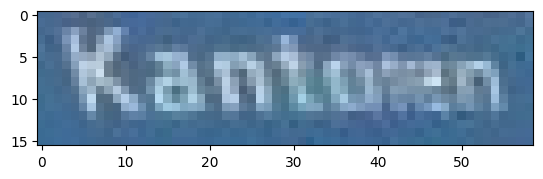

In [108]:
# GENTRIFIED
for path in pano_gen_paths:
    img = Image.open(path)
    plt.imshow(img)
    plt.show()

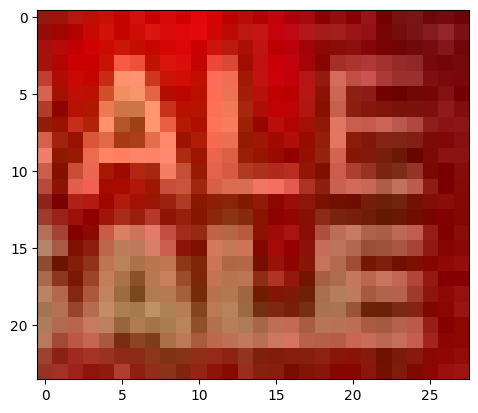

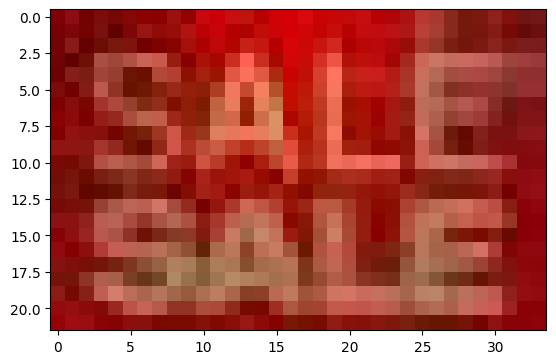

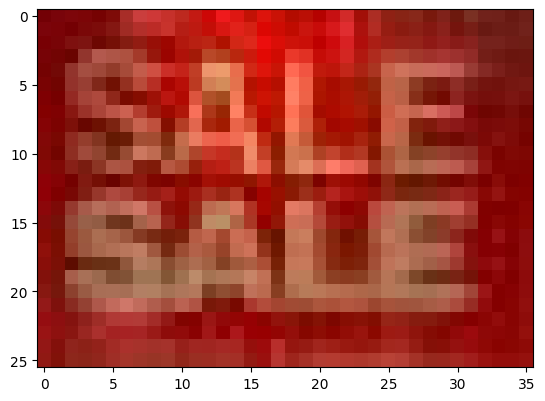

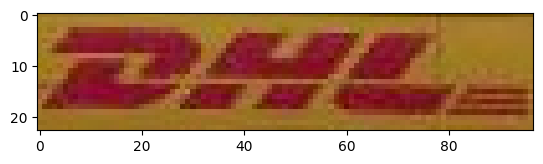

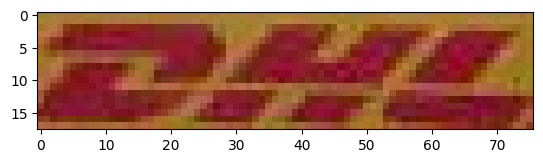

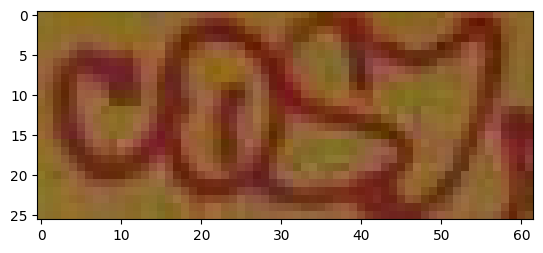

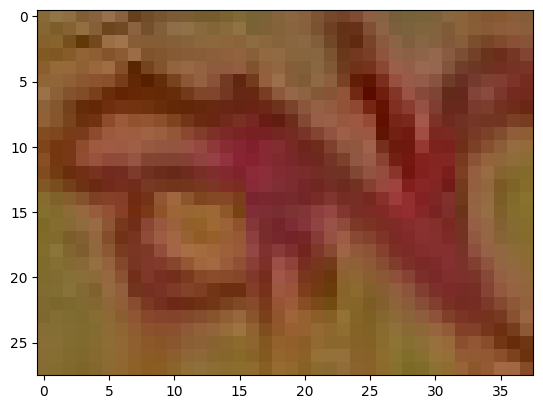

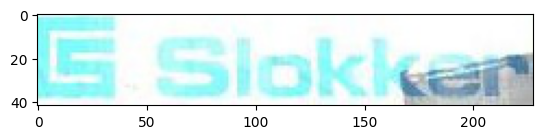

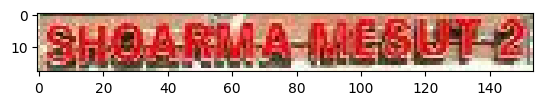

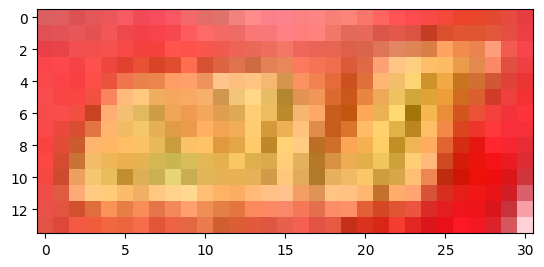

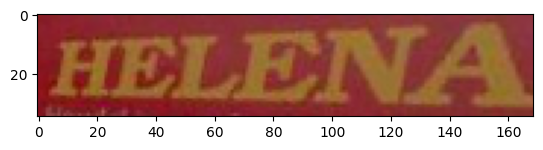

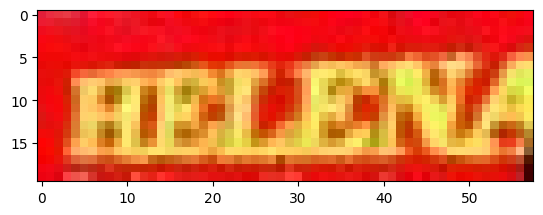

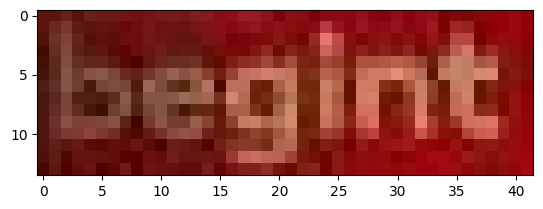

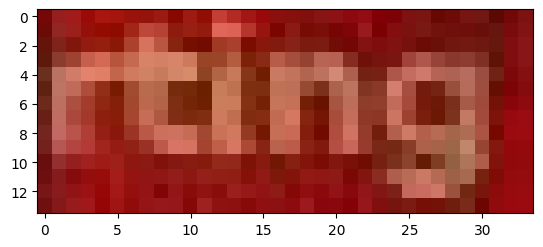

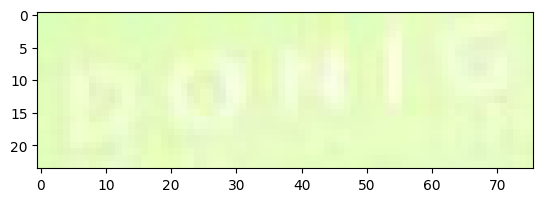

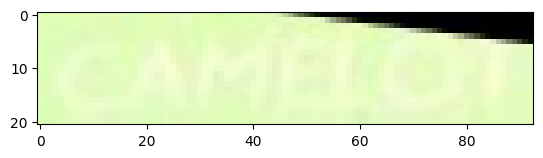

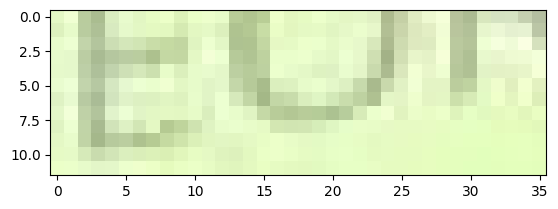

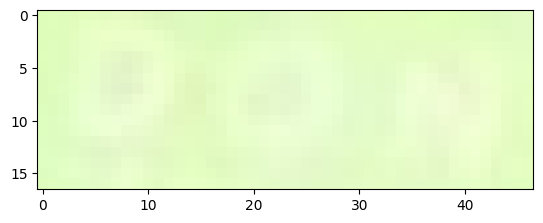

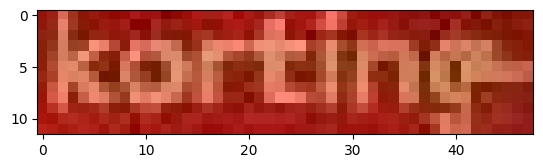

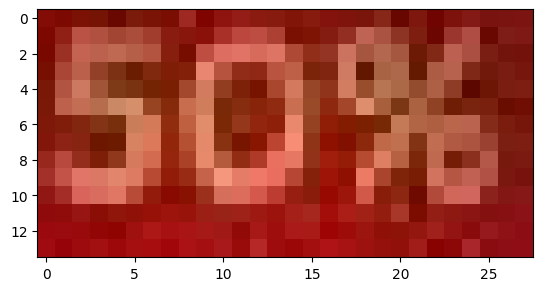

In [109]:
# NON-GENTRIFIED
for path in pano_non_paths:
    img = Image.open(path)
    plt.imshow(img)
    plt.show()